In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

sns.set_theme(style="whitegrid", font_scale=1.2, context="paper")


palette=sns.husl_palette(n_colors=8, h=.5)
palette

[(0.20964485513246672, 0.6785281560863641, 0.6309437466865638),
 (0.22181479393338166, 0.6591751354476563, 0.7983794600460552),
 (0.6074990214813099, 0.5617786874037659, 0.958321796812743),
 (0.9594909116362406, 0.3734126556347139, 0.8981189191653253),
 (0.9673068486894055, 0.43760373463479557, 0.5661632485543318),
 (0.828795785793166, 0.5537127440336859, 0.19519722268536394),
 (0.6112562547547398, 0.6365730658187477, 0.1936175993332644),
 (0.19616613168000974, 0.6978295963986295, 0.3527237399950759)]

In [2]:
path_BASE = f"/home/WUR/katz001/PROJECTS/permit-nsti-gas"
target = "Conclusion_micro"

folderFigures =  f"{path_BASE}/figures/datasetComparison"
os.makedirs(folderFigures, exist_ok=True)

ENTRY 	 iterativeBoruta_100perc 	 6 
 ['AGE', 'UPPER_ARM_ARRIVAL', 'LOWER_ARM_ARRIVAL', 'ANOGENITAL_ARRIVAL', 'SURGERY_BEFORE', 'DIABETES'] 


PRESURGERY 	 iterativeBoruta_100perc 	 8 
 ['creatinine_preop', 'hgb_preop', 'UPPER_ARM_ARRIVAL', 'LOWER_ARM_ARRIVAL', 'ANOGENITAL_ARRIVAL', 'DIABETES', 'SURGERY_BEFORE', 'AGE'] 


POSTSURGERY 	 iterativeBoruta_100perc 	 9 
 ['sample_site_1', 'creatinine_preop', 'hgb_preop', 'UPPER_ARM_ARRIVAL', 'ANOGENITAL_ARRIVAL', 'SURGERY_BEFORE', 'DIABETES', 'LOWER_ARM_ARRIVAL', 'preadmission_creatinine'] 


BL 	 iterativeBoruta_100perc 	 14 
 ['sys_bp_low_bl', 'creatinine_preop', 'hgb_preop', 'creatinine_BL', 'NA_max_BL', 'platelet_BL', 'lactate_BL', 'glucose_BL', 'ANOGENITAL_ARRIVAL', 'SURGERY_BEFORE', 'preadmission_creatinine', 'LOWER_ARM_ARRIVAL', 'UPPER_ARM_ARRIVAL', 'DIABETES'] 




,precision,recall,f1,accuracy,model,roc_auc,average_prec,dataset
0,0.5242718446601942,0.8571428571428571,0.6506024096385542,0.7554265522463401,rfc,0.80371866060912,0.604325896681969,ENTRY
0,0.6326530612244898,0.7380952380952381,0.6813186813186813,0.7736412586235908,rfc,0.8383252005160132,0.7037200354659141,PRESURGERY
0,0.6172839506172839,0.7936507936507936,0.6944444444444444,0.787284760782994,rfc,0.8388019518761569,0.7003123642687855,POSTSURGERY
0,0.7572815533980582,0.6190476190476191,0.6812227074235808,0.7653541982163891,rfc,0.8459532222783106,0.7041129951318015,BL


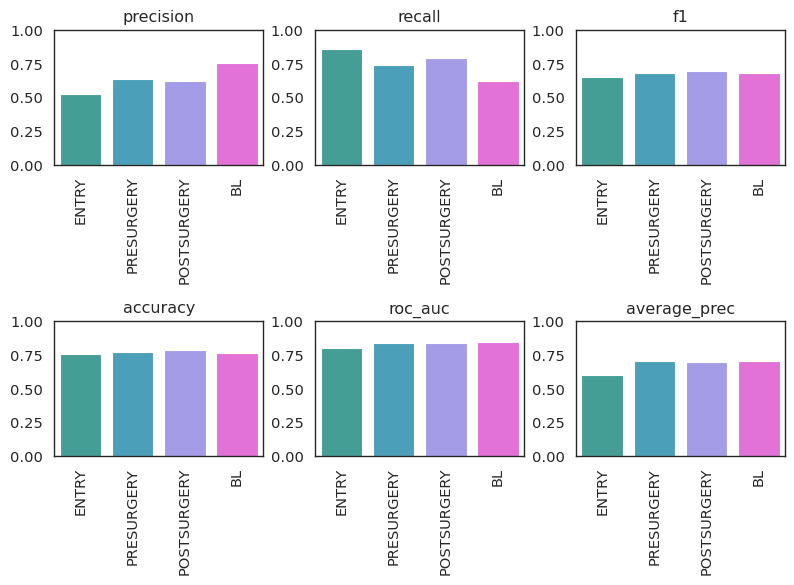

In [7]:
''' 
Specify what to plot here:
'''
settings = {
    "ENTRY": ["rfc", "iterativeBoruta_100perc"],
    "PRESURGERY": ["rfc", "iterativeBoruta_100perc"],
    "POSTSURGERY": ["rfc", "iterativeBoruta_100perc"],
    "BL": ["rfc", "iterativeBoruta_100perc"],
}


datasetList = settings.keys()

''' Load data'''
df_scoring = pd.DataFrame()
for dataset in datasetList:
    model = settings[dataset][0]
    vars = settings[dataset][1]
    varPath = f"{path_BASE}/results/20_featureSelection/{dataset}/CV/{target}_bootstrapped_{vars}.txt"
    path_results = f"{path_BASE}/results/30_modelComparison/{dataset}/{vars}/modelComparison"
    df = pd.read_csv(path_results+f"/prediction_modelComparison_{model}_minimiseFN.csv", index_col=0).T   
    df["dataset"] = dataset
    df_scoring = pd.concat([df_scoring, df], axis=0)
    ### Optional:
    print(dataset, "\t", vars, "\t", len(pd.read_csv(varPath, header=None)[0].tolist()), "\n",pd.read_csv(varPath, header=None)[0].tolist(), "\n\n")


''' Plot '''
fig, (axs_upper, axs_lower) = plt.subplots(2,3, figsize=(8,6))
df_scoring_plot = df_scoring.melt("dataset")
for ax, metric in zip(axs_upper, df_scoring.drop("model", axis=1).columns.tolist()[:3]):
    df = df_scoring_plot[df_scoring_plot["variable"] == metric]
    df.loc[:,"value"] = df.loc[:,"value"].astype('float')
    sns.barplot(data=df, x="dataset", y="value", ax=ax, palette=palette) # palette=c
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_title(metric)
    ax.set_ylabel("")
    ax.set_ylim(0,1)
    ax.set_xticklabels(list(df_scoring["dataset"]))
for ax, metric in zip(axs_lower, df_scoring.drop("model", axis=1).columns.tolist()[3:]):
    df = df_scoring_plot[df_scoring_plot["variable"] == metric]
    df.loc[:,"value"] = df.loc[:,"value"].astype('float')
    sns.barplot(data=df, x="dataset", y="value", ax=ax, palette=palette) # palette=c
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(metric)
    ax.set_ylim(0,1)
    ax.set_xticklabels(list(df_scoring["dataset"]))

plt.tight_layout() 
fig.savefig(f"{folderFigures}/comparisonModels_{dataset}.png", dpi=300)

df_scoring

ENTRY rfc iterativeBoruta_100perc
PRESURGERY rfc iterativeBoruta_100perc
POSTSURGERY rfc iterativeBoruta_100perc
BL rfc iterativeBoruta_100perc


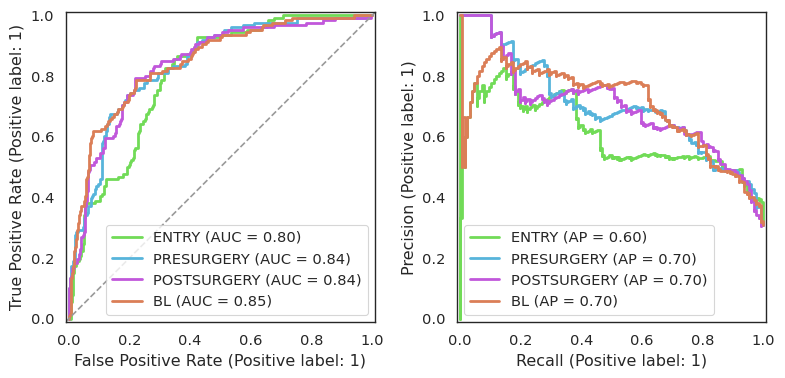

In [8]:
sns.set_theme(style="white", font_scale=1.2, context="paper")
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

i=0
for dataset, val in settings.items():
    model = val[0]
    vars = val[1]

    print(dataset, model, vars)

    path_results = f"{path_BASE}/results/30_modelComparison/{dataset}/{vars}/modelComparison"

    ###### individualPred ######
    df_indPred = pd.read_csv(os.path.join(path_results, f"individualPredictions_modelComparison_{model}.csv"))

    
    RocCurveDisplay.from_predictions(
        df_indPred["y_true"],
        df_indPred["y_predProb"],
        name=f"{dataset}",
        color=sns.hls_palette(n_colors=4, h=.3)[i],
        linewidth=2,
        ax=ax1)
    

    PrecisionRecallDisplay.from_predictions(df_indPred["y_true"],  
                                        df_indPred["y_predProb"], 
                                        name=f"{dataset}",
                                        color=sns.hls_palette(n_colors=4, h=.3)[i],
                                        linewidth=2,
                                        ax=ax2)
    
    i+=1
    
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="--", c=".6", label='Random classifier')
#plt.show()
plt.tight_layout()
fig.savefig(f"{folderFigures}/comparisonModels_all.png", dpi=300)